In [1]:
import numpy as np
import pandas as pd 
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

from tqdm.notebook import tqdm

### A/A тест, проверка сплитования (проверка ttest при разных дисперсиях и средних)

$ {X1, X2, .. Xn} \sim {N}(0,1) $

  0%|          | 0/10000 [00:00<?, ?it/s]

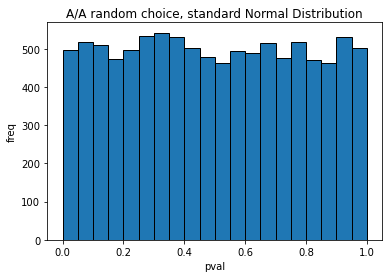

0.0496


In [2]:
num_experiments = 10000
pvals = []

# a = np.random.normal(0, 1, size=10000)
# b = np.random.normal(0, 1, size=10000)

for exp in tqdm(range(num_experiments)):
    a_boots = np.random.normal(0, 1, size=10000)
    b_boots = np.random.normal(0, 1, size=10000)
    _,pval = stats.ttest_ind(b_boots, a_boots)
    pvals.append(pval)

plt.hist(pvals, bins=20, edgecolor='black')
plt.xlabel('pval')
plt.ylabel('freq')
plt.title('A/A random choice, standard Normal Distribution')
plt.show()

print(np.mean(np.array(pvals) < 0.05))

# проверка для стандартного нормального распределения, ошибка первого рода в пределах нормы


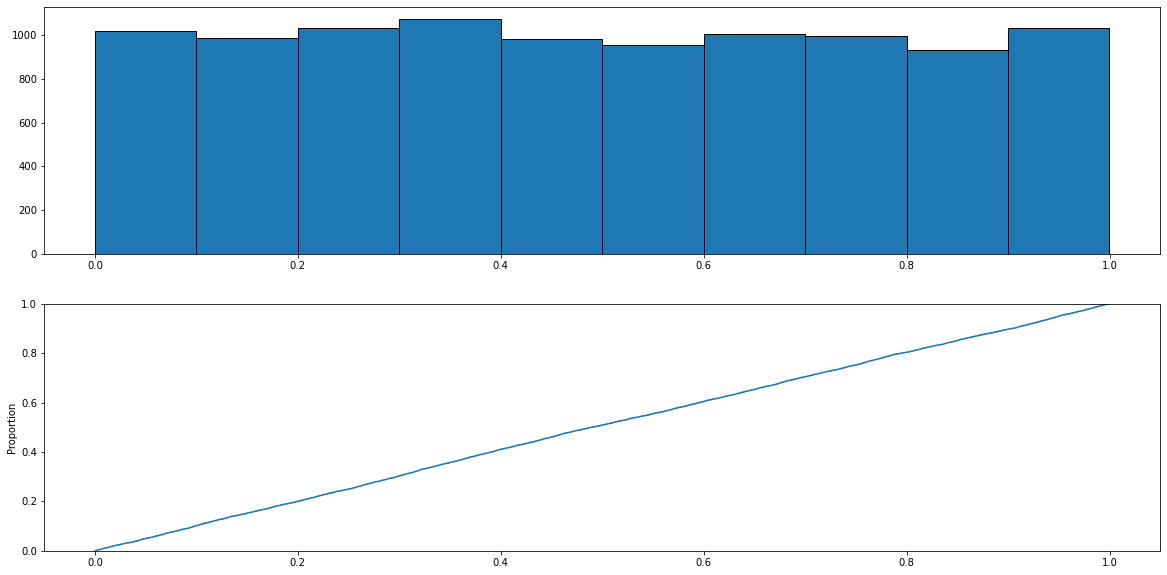

In [3]:
fig, ax = plt.subplots(2, figsize = (20, 10))
ax[0].hist(pvals, edgecolor = 'black')
if ax[1]:
    sns.ecdfplot(pvals)

$ {X1, X2, .. Xn} \sim {N}(100,20) $

  0%|          | 0/10000 [00:00<?, ?it/s]

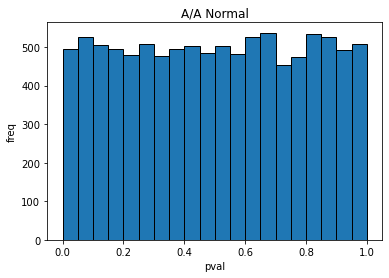

0.0495


In [4]:
num_experiments = 10000
pvals = []

for exp in tqdm(range(num_experiments)):
    a_boots = np.random.normal(100, 20, size=10000)
    b_boots = np.random.normal(100, 20, size=10000)
    _,pval = stats.ttest_ind(b_boots, a_boots)
    pvals.append(pval)

plt.hist(pvals, bins=20, edgecolor='black')
plt.xlabel('pval')
plt.ylabel('freq')
plt.title('A/A Normal')
plt.show()

print(np.mean(np.array(pvals) < 0.05))

# реализация бутстрэпа должна выглядеть по-другому, поскольку здесь мы получаем оценку подвыборки, а не средних, которые
# уже должны быть взяты для сравнения, но в любом случае, почему здесь мы получаем скошенное распределение, однако для подвыборки
# важно, чтобы распределения получались параметрические (одинаково распределенные), поскольку далее мы получаем скос. Давайте посмотрим на другие распределения

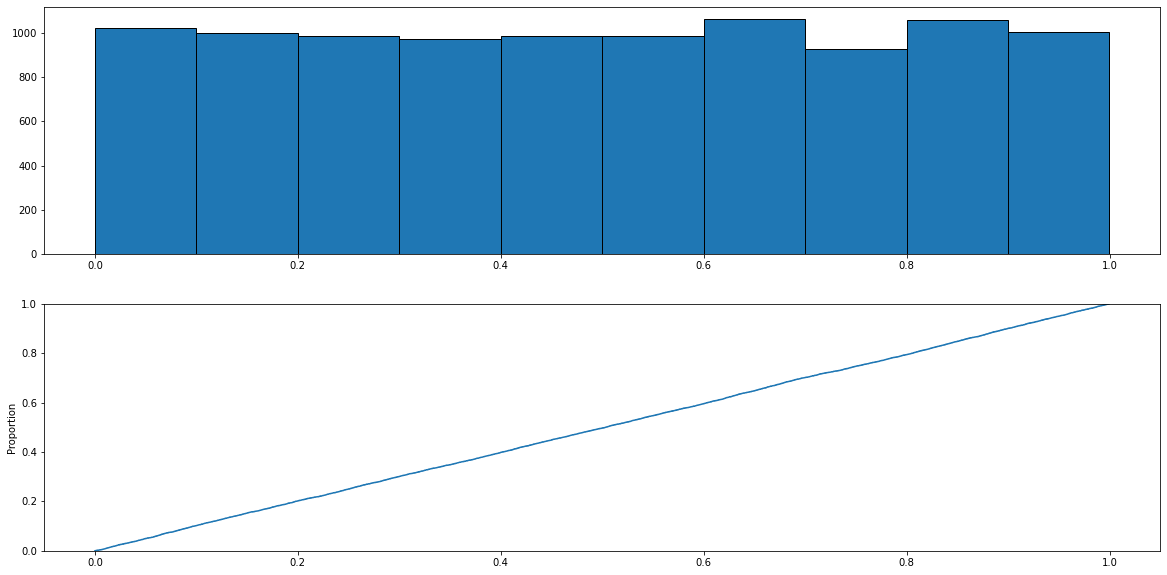

In [5]:
fig, ax = plt.subplots(2, figsize = (20, 10))
ax[0].hist(pvals, edgecolor = 'black')
if ax[1]:
    sns.ecdfplot(pvals)

# Логнормальное распределение

$ {X1, X2, .. Xn} \sim {Lognorm}(100,20) $

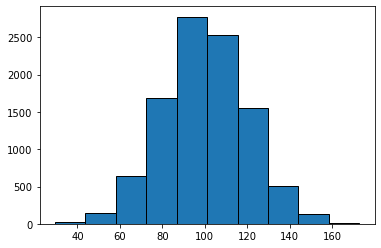

In [6]:
plt.hist(np.log(np.random.lognormal(100, 20, size=10000)), edgecolor='black');
# применение логарифма для нормализации

  0%|          | 0/10000 [00:00<?, ?it/s]

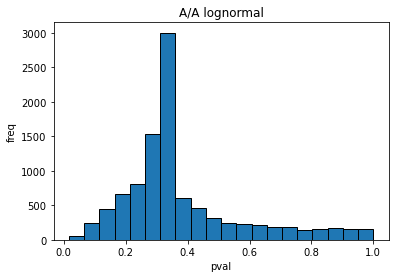

0.0026


In [7]:
num_experiments = 10000
pvals = []

for exp in tqdm(range(num_experiments)):
    a_boots = np.random.lognormal(0, 10, size=10000)
    b_boots = np.random.lognormal(0, 10, size=10000)
    _,pval = stats.ttest_ind(b_boots, a_boots)
    pvals.append(pval)

plt.hist(pvals, bins=20, edgecolor='black')
plt.xlabel('pval')
plt.ylabel('freq')
plt.title('A/A lognormal')
plt.show()

print(np.mean(np.array(pvals) < 0.05))

# логнормальное при приведению к нормальному дает pvalue адекватное, однако, экстремальные значения дисперсии дают неравномерное
# распределение, это нужно аффектить. Дисперсия не должна быть слишком большой для применения t-testa, поскольку t-статистика
# сильно занижается, из-за этого, с определенной погрешностью 

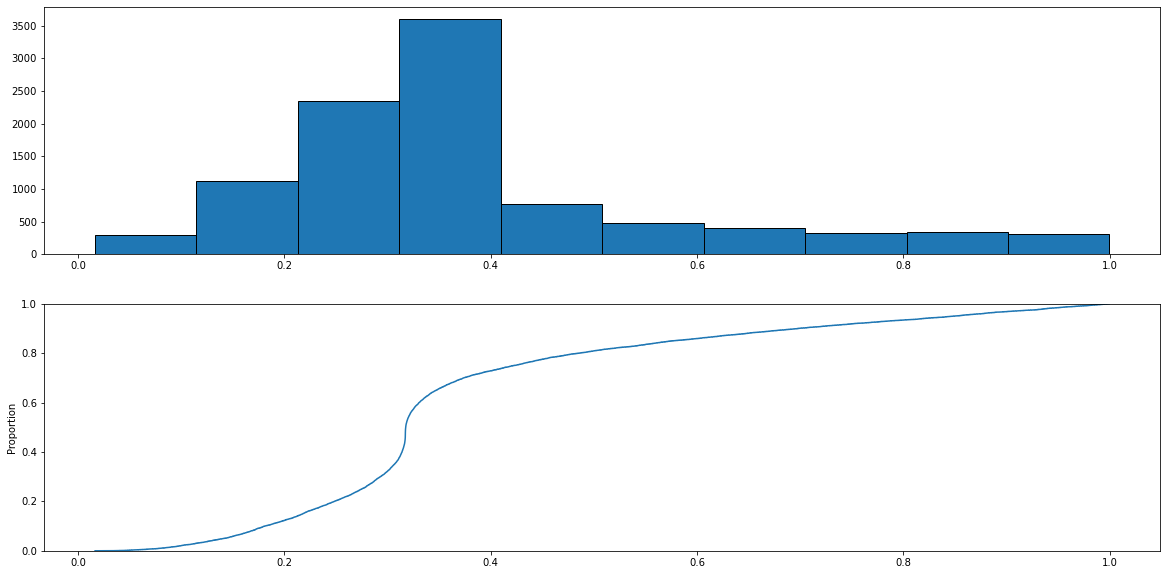

In [8]:
fig, ax = plt.subplots(2, figsize = (20, 10))
ax[0].hist(pvals, edgecolor = 'black')
if ax[1]:
    sns.ecdfplot(pvals)

# Экспоненциальное распределение

$ {X1, X2, .. Xn} \sim {exp}(100) $

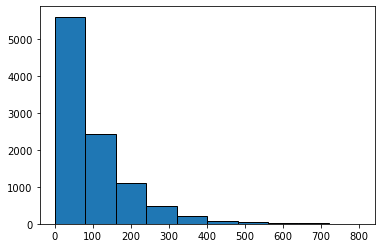

In [9]:
plt.hist(np.random.exponential(100, size = 10000), edgecolor='black');

  0%|          | 0/10000 [00:00<?, ?it/s]

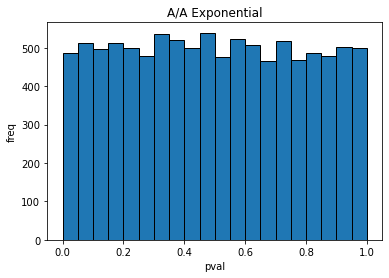

0.0486


In [10]:
num_experiments = 10000
pvals = []

for exp in tqdm(range(num_experiments)):
    a_boots = np.random.exponential(100, size=10000)
    b_boots = np.random.exponential(100, size=10000)
    _,pval = stats.ttest_ind(b_boots, a_boots)
    pvals.append(pval)

plt.hist(pvals, bins=20, edgecolor='black')
plt.xlabel('pval')
plt.ylabel('freq')
plt.title('A/A Exponential')
plt.show()

print(np.mean(np.array(pvals) < 0.05))

# Экспоненциальное +- отражает то, что нужно, посмотрим на дискретные распределения, как они себя ведут при разных весах

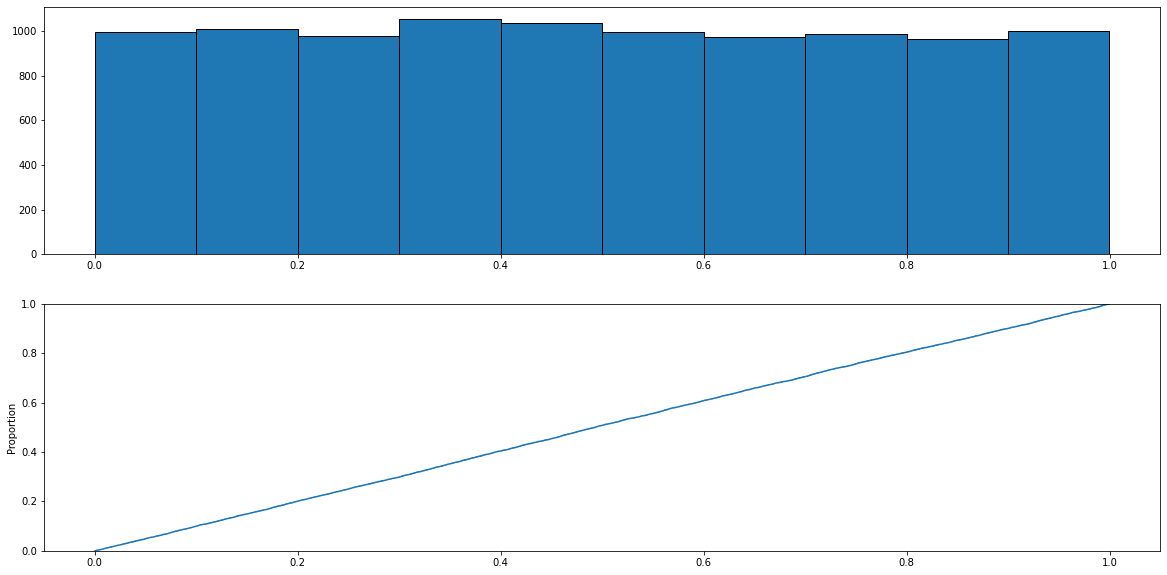

In [11]:
fig, ax = plt.subplots(2, figsize = (20, 10))
ax[0].hist(pvals, edgecolor = 'black')
if ax[1]:
    sns.ecdfplot(pvals)

###### Почему логнормальное распределение не имеет нормальное распределение среднего?

  0%|          | 0/10000 [00:00<?, ?it/s]

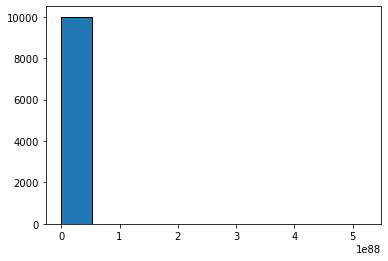

In [12]:
means_for_lognormal = []
for i in tqdm(range(10000)):
    a = np.random.lognormal(100, 20, size = 10000)
    a_mean = np.mean(a)
    means_for_lognormal.append(a_mean)

plt.hist(means_for_lognormal, edgecolor='black');

# выше писал, экстремальные значения, которые занижают t-статистику при расчете

# Хи-квадрат, Фишер, Стьюдент

  0%|          | 0/10000 [00:00<?, ?it/s]

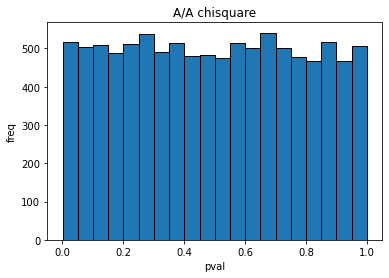

0.0514


In [13]:
#хи-квадрат

num_experiments = 10000
pvals = []

for exp in tqdm(range(num_experiments)):
    a_boots = np.random.chisquare(df=5, size=10000)
    b_boots = np.random.chisquare(df=5, size=10000)
    _,pval = stats.ttest_ind(b_boots, a_boots)
    pvals.append(pval)

plt.hist(pvals, bins=20, edgecolor='black')
plt.xlabel('pval')
plt.ylabel('freq')
plt.title('A/A chisquare')
plt.show()

print(np.mean(np.array(pvals) < 0.05))

# при увеличении степеней свобод (df) функция плотность постепенно становится более приземистой к оси X, pval равномерно)

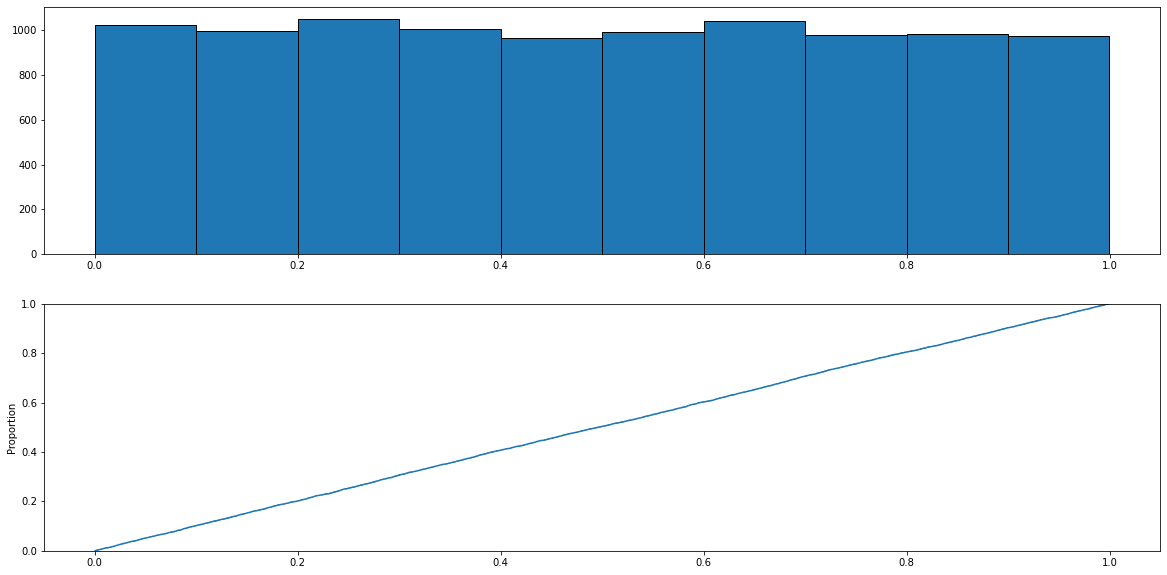

In [14]:
fig, ax = plt.subplots(2, figsize = (20, 10))
ax[0].hist(pvals, edgecolor = 'black')
if ax[1]:
    sns.ecdfplot(pvals)

  0%|          | 0/10000 [00:00<?, ?it/s]

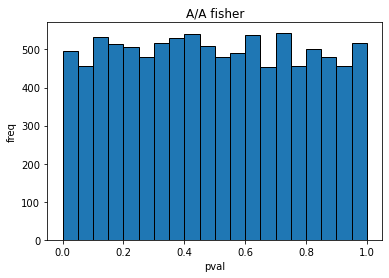

0.0497


In [15]:
#фишер

num_experiments = 10000
pvals = []

for exp in tqdm(range(num_experiments)):
    a_boots = stats.f(dfn=5, dfd=5).rvs(10000)
    b_boots = stats.f(dfn=5, dfd=5).rvs(10000)
    _,pval = stats.ttest_ind(b_boots, a_boots)
    pvals.append(pval)

plt.hist(pvals, bins=20, edgecolor='black')
plt.xlabel('pval')
plt.ylabel('freq')
plt.title('A/A fisher')
plt.show()

print(np.mean(np.array(pvals) < 0.05))

# при увеличении степеней свобод (df) функция плотность постепенно становится более приземистой к оси X, pval равномерно)

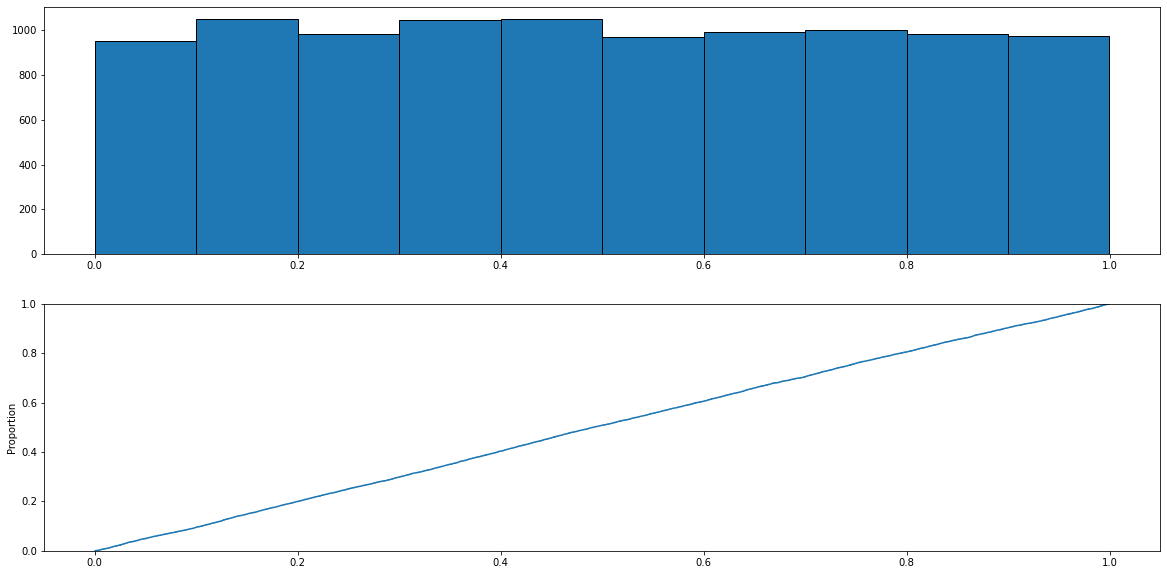

In [16]:
fig, ax = plt.subplots(2, figsize = (20, 10))
ax[0].hist(pvals, edgecolor = 'black')
if ax[1]:
    sns.ecdfplot(pvals)

  0%|          | 0/10000 [00:00<?, ?it/s]

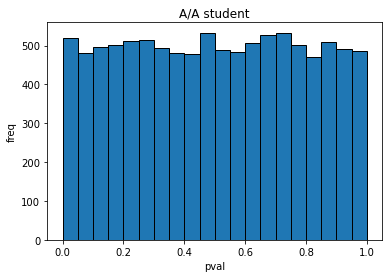

0.0519


In [17]:
#стьюдент

num_experiments = 10000
pvals = []

for exp in tqdm(range(num_experiments)):
    a_boots = stats.t(df=30).rvs(10000)
    b_boots = stats.t(df=30).rvs(10000)
    _,pval = stats.ttest_ind(b_boots, a_boots)
    pvals.append(pval)

plt.hist(pvals, bins=20, edgecolor='black')
plt.xlabel('pval')
plt.ylabel('freq')
plt.title('A/A student')
plt.show()

print(np.mean(np.array(pvals) < 0.05))

# при увеличении степеней свобод (df) функция плотность постепенно становится более приземистой к оси X, pval равномерно),
# дисперсия стремится к 1 при увеличении степеней свободы, т.к. var = df / (df-2)



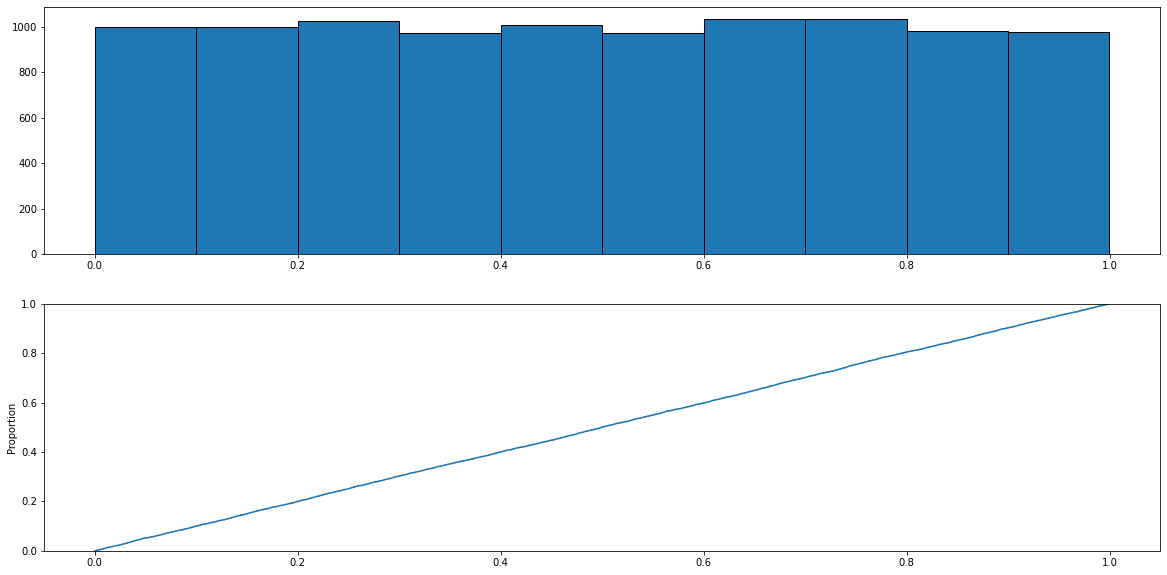

In [18]:
fig, ax = plt.subplots(2, figsize = (20, 10))
ax[0].hist(pvals, edgecolor = 'black')
if ax[1]:
    sns.ecdfplot(pvals)

# Биномиальное распределение

$ {X1, X2, .. Xn} \sim {Bi}(1, 0.5) $

  0%|          | 0/10000 [00:00<?, ?it/s]

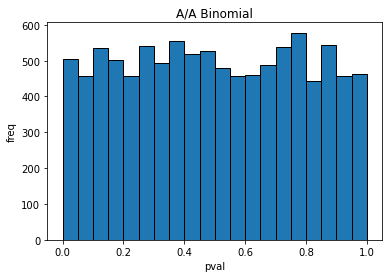

0.0506


In [19]:
num_experiments = 10000
pvals = []

for exp in tqdm(range(num_experiments)):
    a_boots = np.random.binomial(n=1, p=0.5, size=10000)
    b_boots = np.random.binomial(n=1, p=0.5, size=10000)
    _,pval = stats.ttest_ind(b_boots, a_boots)
    pvals.append(pval)

plt.hist(pvals, bins=20, edgecolor='black')
plt.xlabel('pval')
plt.ylabel('freq')
plt.title('A/A Binomial')
plt.show()

print(np.mean(np.array(pvals) < 0.05))

# Экспоненциальное +- отражает то, что нужно, посмотрим на дискретные распределения, как они себя ведут при разных весах

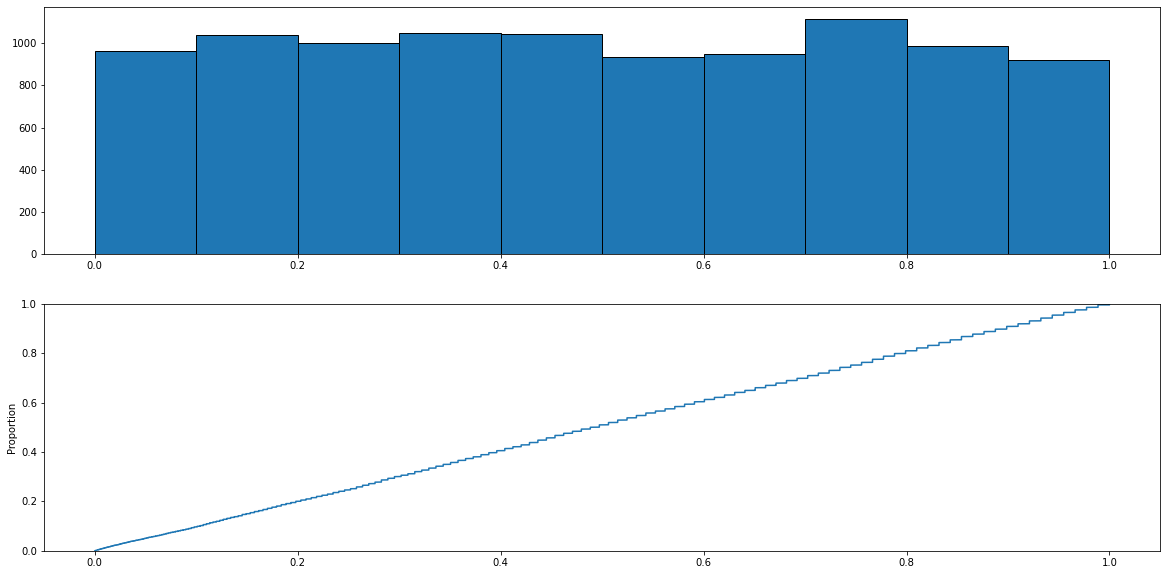

In [20]:
fig, ax = plt.subplots(2, figsize = (20, 10))
ax[0].hist(pvals, edgecolor = 'black')
if ax[1]:
    sns.ecdfplot(pvals)

__ЦПТ для биномиального распределения (ttest допустим, т.к. выборочные средние распределены нормально)__

  0%|          | 0/10000 [00:00<?, ?it/s]

Text(0, 0.5, 'freq')

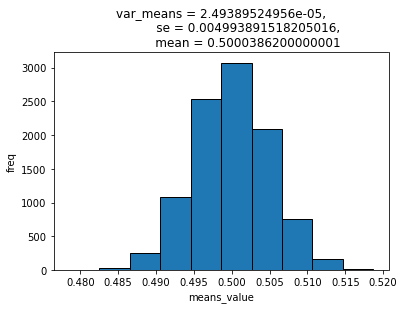

In [21]:
means_binomial = []
for exp in tqdm(range(num_experiments)):
    a_boots = np.random.binomial(n=1, p=0.5, size=10000)
    means_binomial.append(np.mean(a_boots))
plt.hist(means_binomial, edgecolor='black')
plt.title(f"""var_means = {np.var(means_binomial)},
              se = {np.std(means_binomial)},
              mean = {np.mean(means_binomial)}""")
plt.xlabel('means_value')
plt.ylabel('freq')

Дисперсия одинаковая, распределение средних даст нормальное распределение
$ \sigma^2 = \dfrac {p  * (1-p)}{n}  $

__Проверим распределения для разных дисперсий, будут ли проблемы с этим (возможно, тут будет шум, который будет влиять на ошибку первого рода)__

  0%|          | 0/10000 [00:00<?, ?it/s]

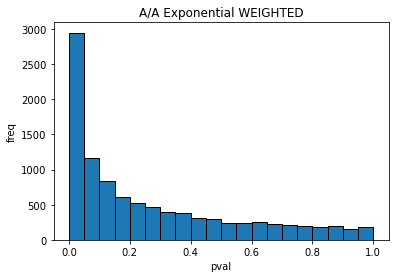

0.2949


In [22]:
num_experiments = 10000
pvals = []

for exp in tqdm(range(num_experiments)):
    a_boots = np.random.binomial(n=1, p=0.5, size=10000)
    b_boots = np.random.binomial(n=1, p=0.49, size=10000)
    _,pval = stats.ttest_ind(b_boots, a_boots)
    pvals.append(pval)

plt.hist(pvals, bins=20, edgecolor='black')
plt.xlabel('pval')
plt.ylabel('freq')
plt.title('A/A Binomial WEIGHTED')
plt.show()

print(np.mean(np.array(pvals) < 0.05))

# Биномиальное максимально чувтсвительно, найдем порог относительно 0.5 при которых мы еще можем видеть на A/A тестах 
# ошибку первого рода = 0.05, или около того, получив равномерное распределение

In [23]:
np.mean(b_boots), np.mean(a_boots)
# разные средние из-за разницы в p, по сути мы влияем на среднее (матожидание)

(0.4903, 0.5053)

1.0
0.998
0.996
0.994
0.992
0.99
0.988
0.986
0.984
0.982
0.98
0.978
0.976
0.974
0.972
0.97
0.968
0.966
0.964
0.962


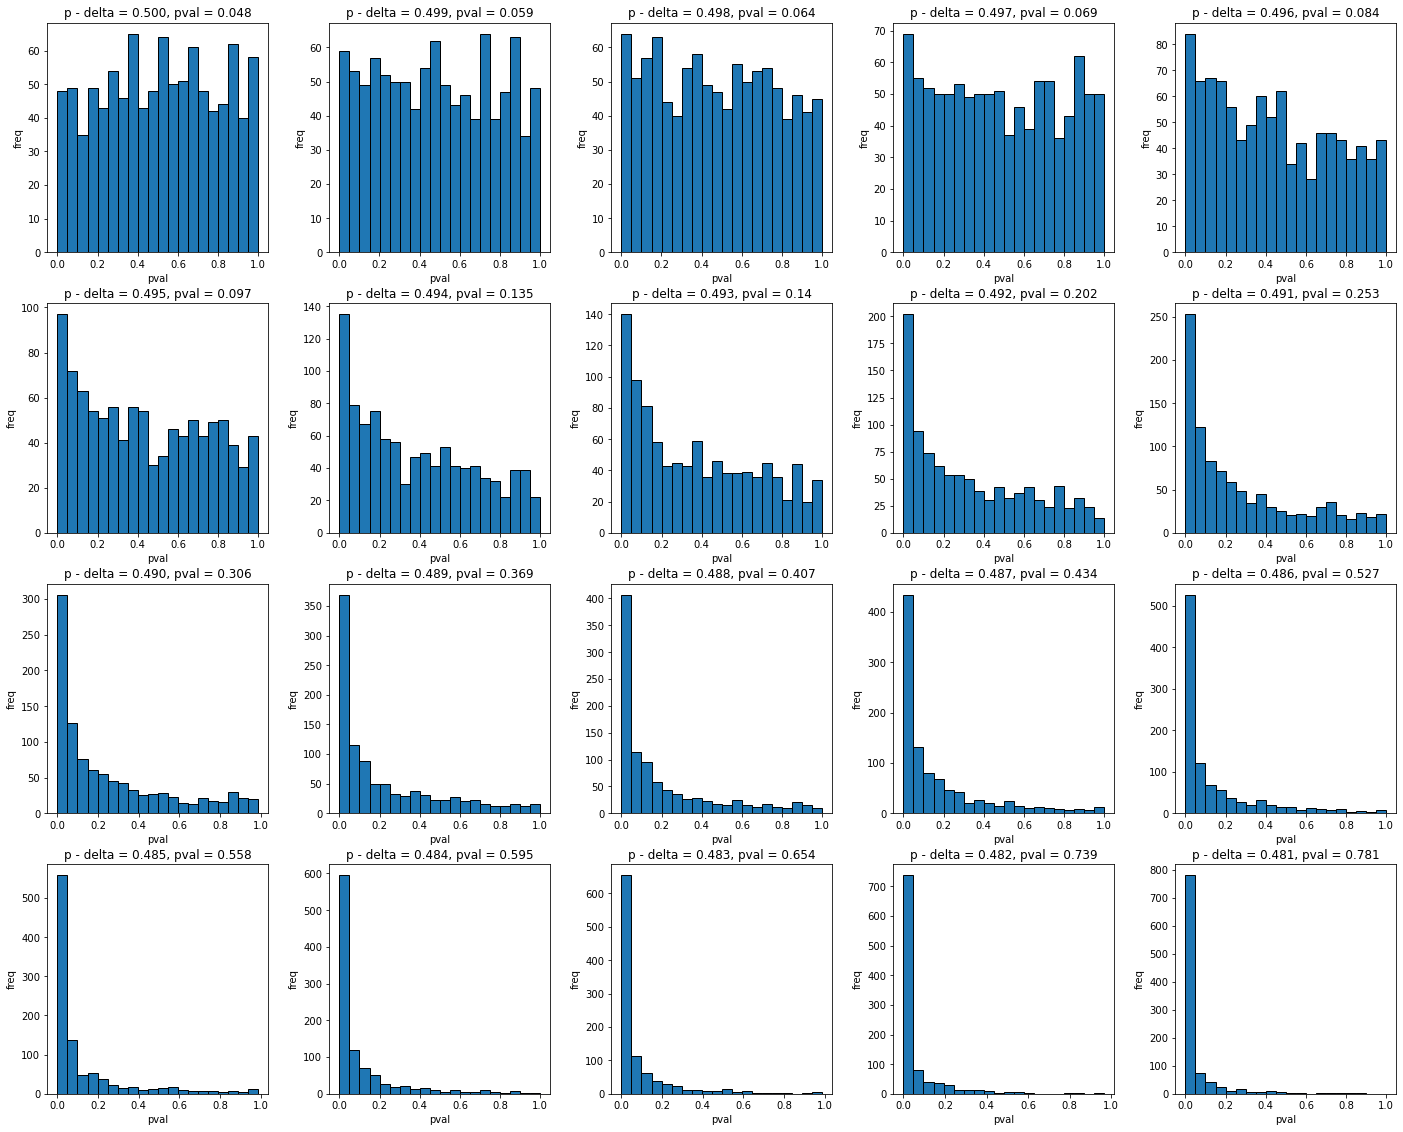

In [24]:
num_experiments = 1000
delta_values = np.arange(0, 0.02, 0.001)  

fig, axes = plt.subplots(4, 5, figsize=(20, 16))  
fig.tight_layout(pad=3.0)

for idx, delta in enumerate(delta_values):
    pvals = []
    for exp in range(num_experiments):
        a_boots = np.random.binomial(n=1, p=0.5, size=10000)
        b_boots = np.random.binomial(n=1, p=0.5 - delta, size=10000)
        _, pval = stats.ttest_ind(b_boots, a_boots)
        pvals.append(pval)
    
    ax = axes[idx // 5, idx % 5]
    ax.hist(pvals, bins=20, edgecolor='black')
    ax.set_title(f'p - delta = {0.5 - delta:.3f}, pval = {np.mean(np.array(pvals) < 0.05)}')
    print(1 - delta / 0.5)
    ax.set_xlabel('pval')
    ax.set_ylabel('freq')

plt.show()

# отклонение > 0.02 критично для биномиального распределения

#### Скос значений из-за увеличения дисперсии, которая дает шум, можно также посмотреть и для других распределений, например, нас может интересовать распределение GMV, или нормально распределенной метрики (например, разница средних)

###### Нормальное распределение

0it [00:00, ?it/s]

1.0
1.2
1.4
1.6
1.8
2.0
2.2
2.4000000000000004
2.6
2.8


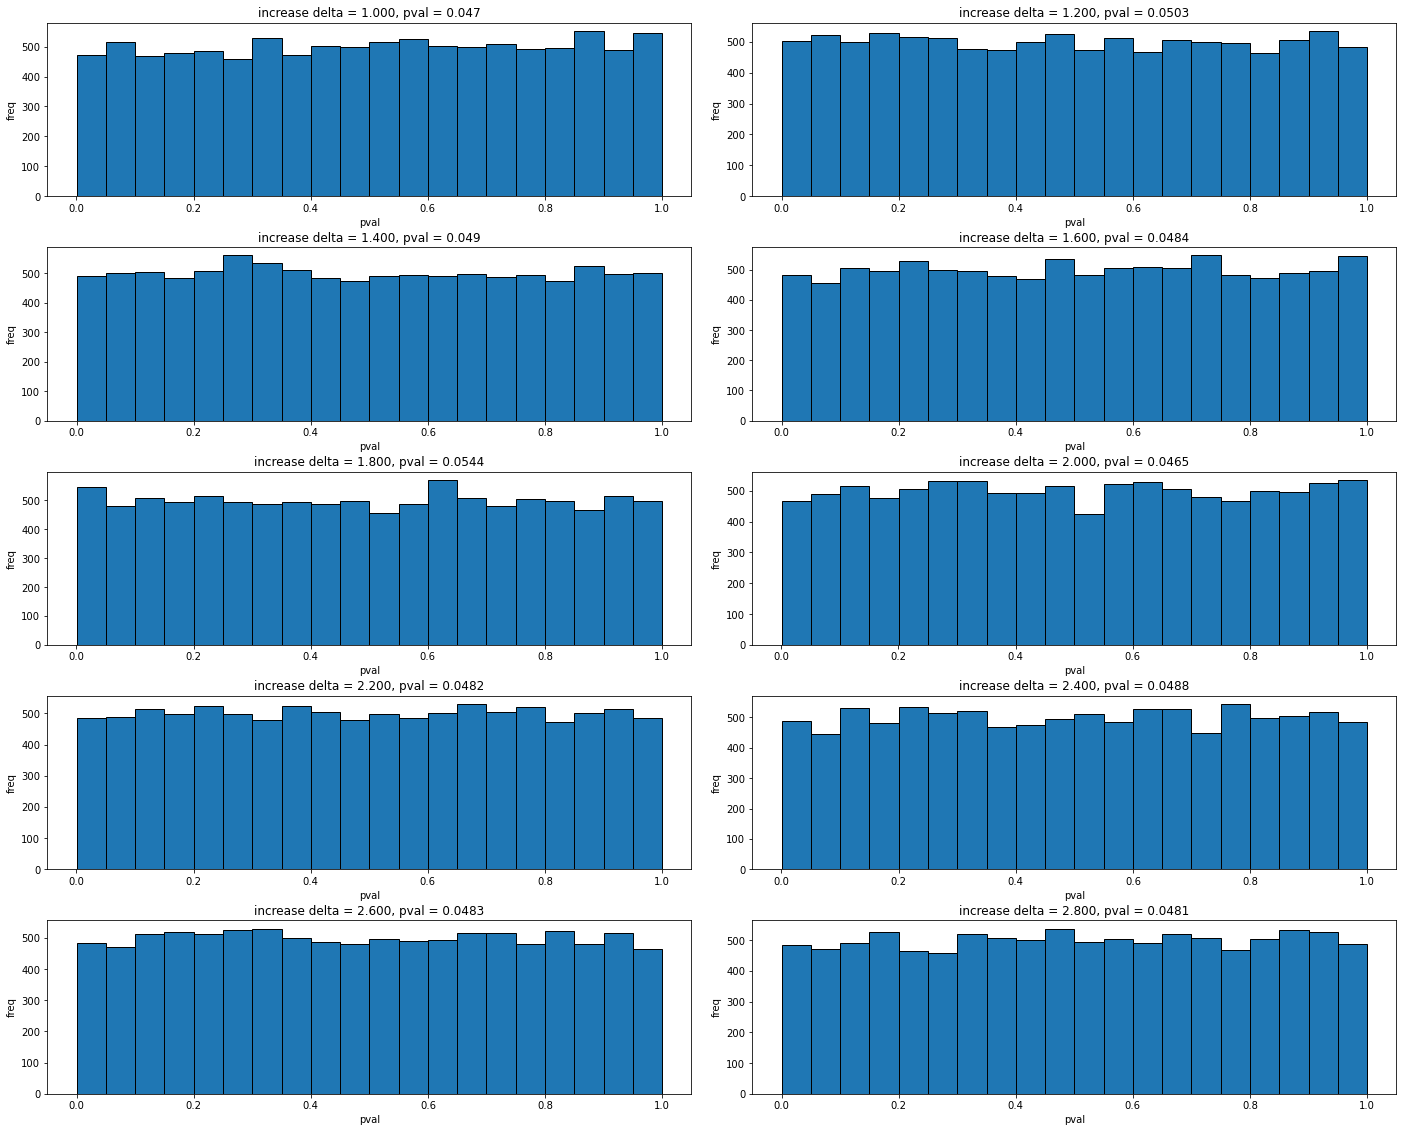

In [25]:
num_experiments = 10000
delta_values = np.arange(0, 2, 0.2)

fig, axes = plt.subplots(5, 2, figsize=(20, 16))  
fig.tight_layout(pad=3.0)

for idx, delta in tqdm(enumerate(delta_values)):
    pvals = []
    for exp in range(num_experiments):
        a_boots = np.random.normal(100, 20, size=10000)
        b_boots = np.random.normal(100, 20 * (1 + delta), size=10000)
        _, pval = stats.ttest_ind(b_boots, a_boots)
        pvals.append(pval)
    
    ax = axes[idx // 2, idx % 2]
    ax.hist(pvals, bins=20, edgecolor='black')
    ax.set_title(f'increase delta = {(1+delta) :.3f}, pval = {np.mean(np.array(pvals) < 0.05)}')
    print((1+delta))
    ax.set_xlabel('pval')
    ax.set_ylabel('freq')

plt.show()

# на ошибку первого рода дисперсия не влияет, по сути, на последней итерации была увеличена в несколько раз дисперсия,
# как пример, на последней итерации графики будут выглядеть следующим образом (после 10, указанных для сплита)

##### Логнормальное распределение

0it [00:00, ?it/s]

1.0
1.025
1.05
1.075
1.1
1.125
1.15
1.175
1.2
1.225


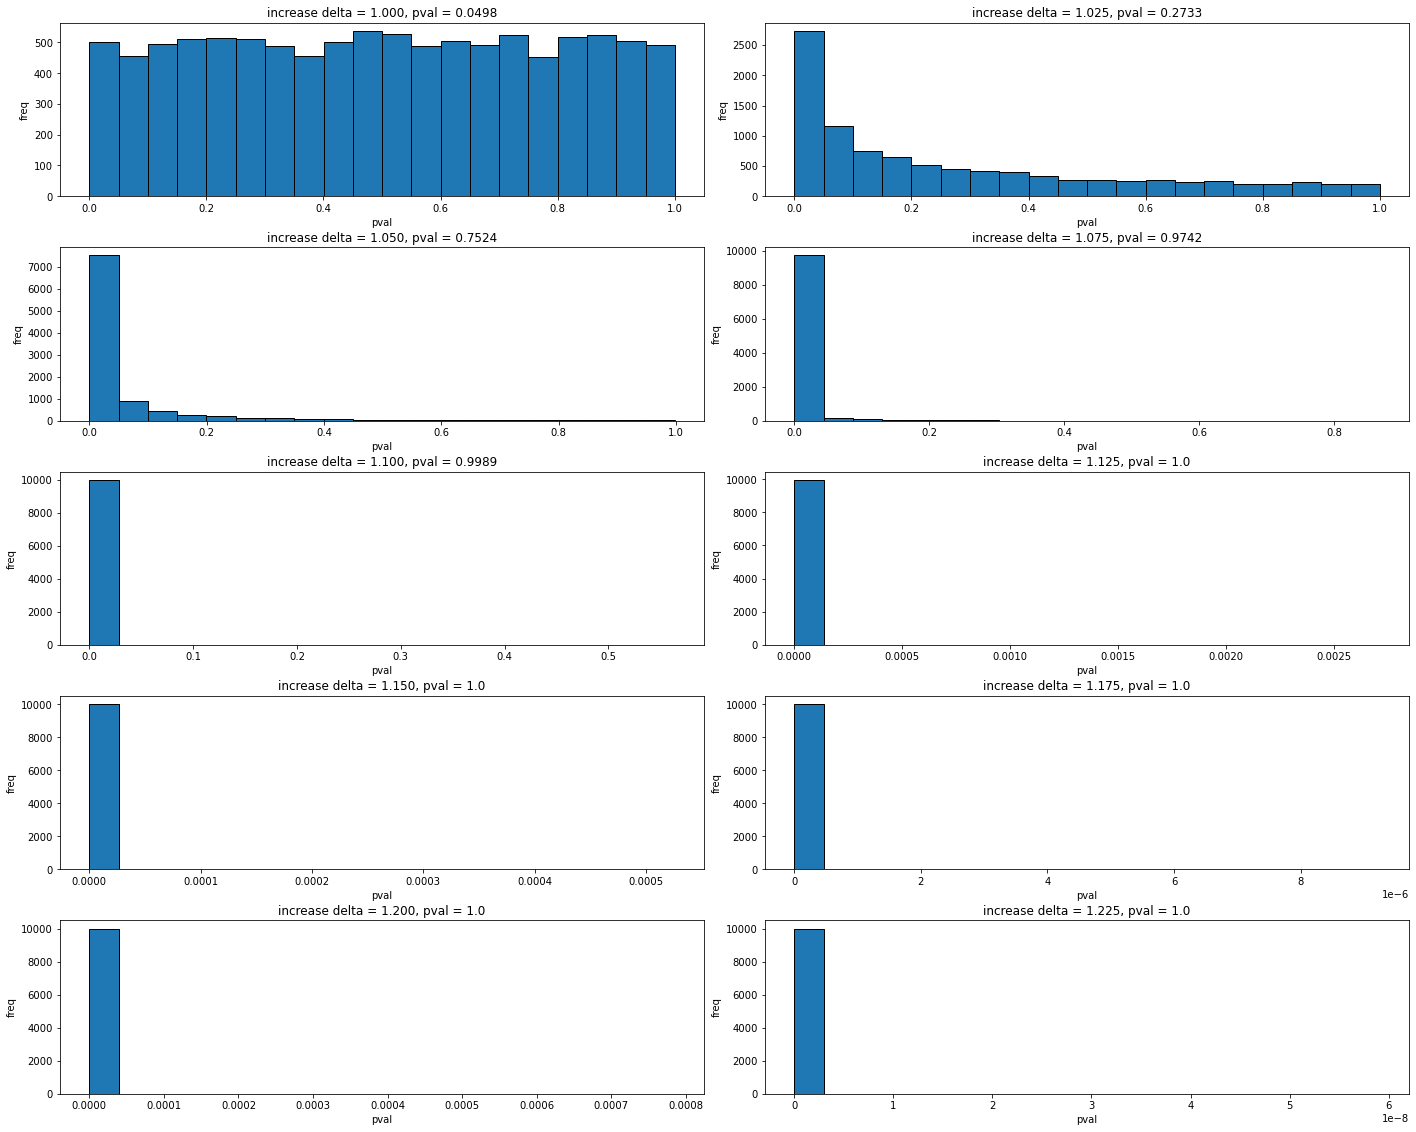

In [26]:
num_experiments = 10000
delta_values = np.arange(0, 0.25, 0.025)

fig, axes = plt.subplots(5, 2, figsize=(20, 16))  
fig.tight_layout(pad=3.0)

for idx, delta in tqdm(enumerate(delta_values)):
    pvals = []
    for exp in range(num_experiments):
        a_boots = np.random.lognormal(0, 1, size=10000)
        b_boots = np.random.lognormal(0, 1 * (1 + delta), size=10000)
        _, pval = stats.ttest_ind(b_boots, a_boots)
        pvals.append(pval)
    
    ax = axes[idx // 2, idx % 2]
    ax.hist(pvals, bins=20, edgecolor='black')
    ax.set_title(f'increase delta = {(1+delta) :.3f}, pval = {np.mean(np.array(pvals) < 0.05)}')
    print((1+delta))
    ax.set_xlabel('pval')
    ax.set_ylabel('freq')

plt.show()

# на ошибку первого рода дисперсия не влияет, по сути, на последней итерации была увеличена в несколько раз дисперсия,
# как пример, на последней итерации графики будут выглядеть следующим образом (после 10, указанных для сплита).

Предположим, что все корректно и будем менять также в соответствии дисперсией **MDE + %**, а для 
всех наблюдений зафиксируем константы
$ \alpha = 0.05,  
  \beta = 0.2, 
  {size} = 10000 $

  0%|          | 0/10 [00:00<?, ?it/s]

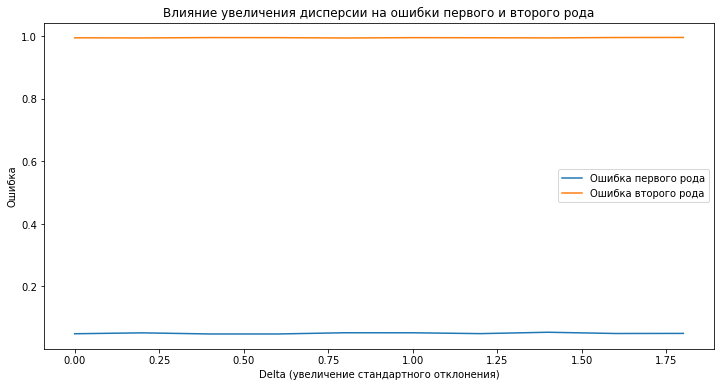

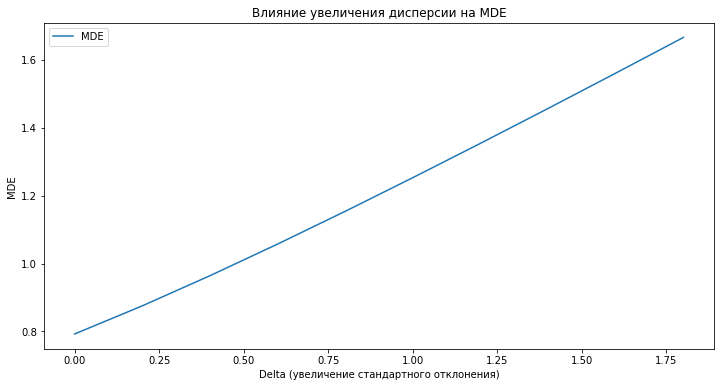

In [29]:
num_experiments = 10000
size = 10000
alpha = 0.05
true_mean_diff = 0  
delta_values = np.arange(0, 2, 0.2)
std_a = 20 
beta = 0.2

error_first_type = []
error_second_type = []
MDE_values = []

def calculate_MDE(std_a, std_b, alpha, beta, size):
    Q = stats.norm.ppf(1 - alpha / 2) + stats.norm.ppf(1 - beta)
    return Q * np.sqrt(std_a**2 / size + std_b**2 / size)

for delta in tqdm(delta_values):
    std_b = std_a * (1 + delta)  
    pvals = []
    observed_means_diff = []
    
    for _ in range(num_experiments):
        a_boots = np.random.normal(100, std_a, size)
        b_boots = np.random.normal(100 + true_mean_diff, std_b, size)
        _, pval = stats.ttest_ind(a_boots, b_boots)
        pvals.append(pval)
        observed_means_diff.append(np.mean(b_boots) - np.mean(a_boots))

    error_first_type.append(np.mean([p < alpha for p in pvals]))
    error_second_type.append(np.mean([np.abs(diff) < calculate_MDE(std_a, std_b, alpha, beta, size) 
                                      for diff in observed_means_diff]))
    MDE_values.append(calculate_MDE(std_a, std_b, alpha, beta, size))

plt.figure(figsize=(12, 6))
plt.plot(delta_values, error_first_type, label='Ошибка первого рода')
plt.plot(delta_values, error_second_type, label='Ошибка второго рода')
plt.xlabel('Delta (увеличение стандартного отклонения)')
plt.ylabel('Ошибка')
plt.title('Влияние увеличения дисперсии на ошибки первого и второго рода')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(delta_values, MDE_values, label='MDE')
plt.xlabel('Delta (увеличение стандартного отклонения)')
plt.ylabel('MDE')
plt.title('Влияние увеличения дисперсии на MDE')
plt.legend()
plt.show()


При увеличении дисперсии, увеличивается MDE, делаем допущение на то, что alpha не меняется в рамках наших экспериментов, но при сохранении alpha и других параметров, получается, что ошибка второго рода также увеличивается. 

### Распределение P-VALUE и граница допустимости для t-теста и нормального распределения метрик

0it [00:00, ?it/s]

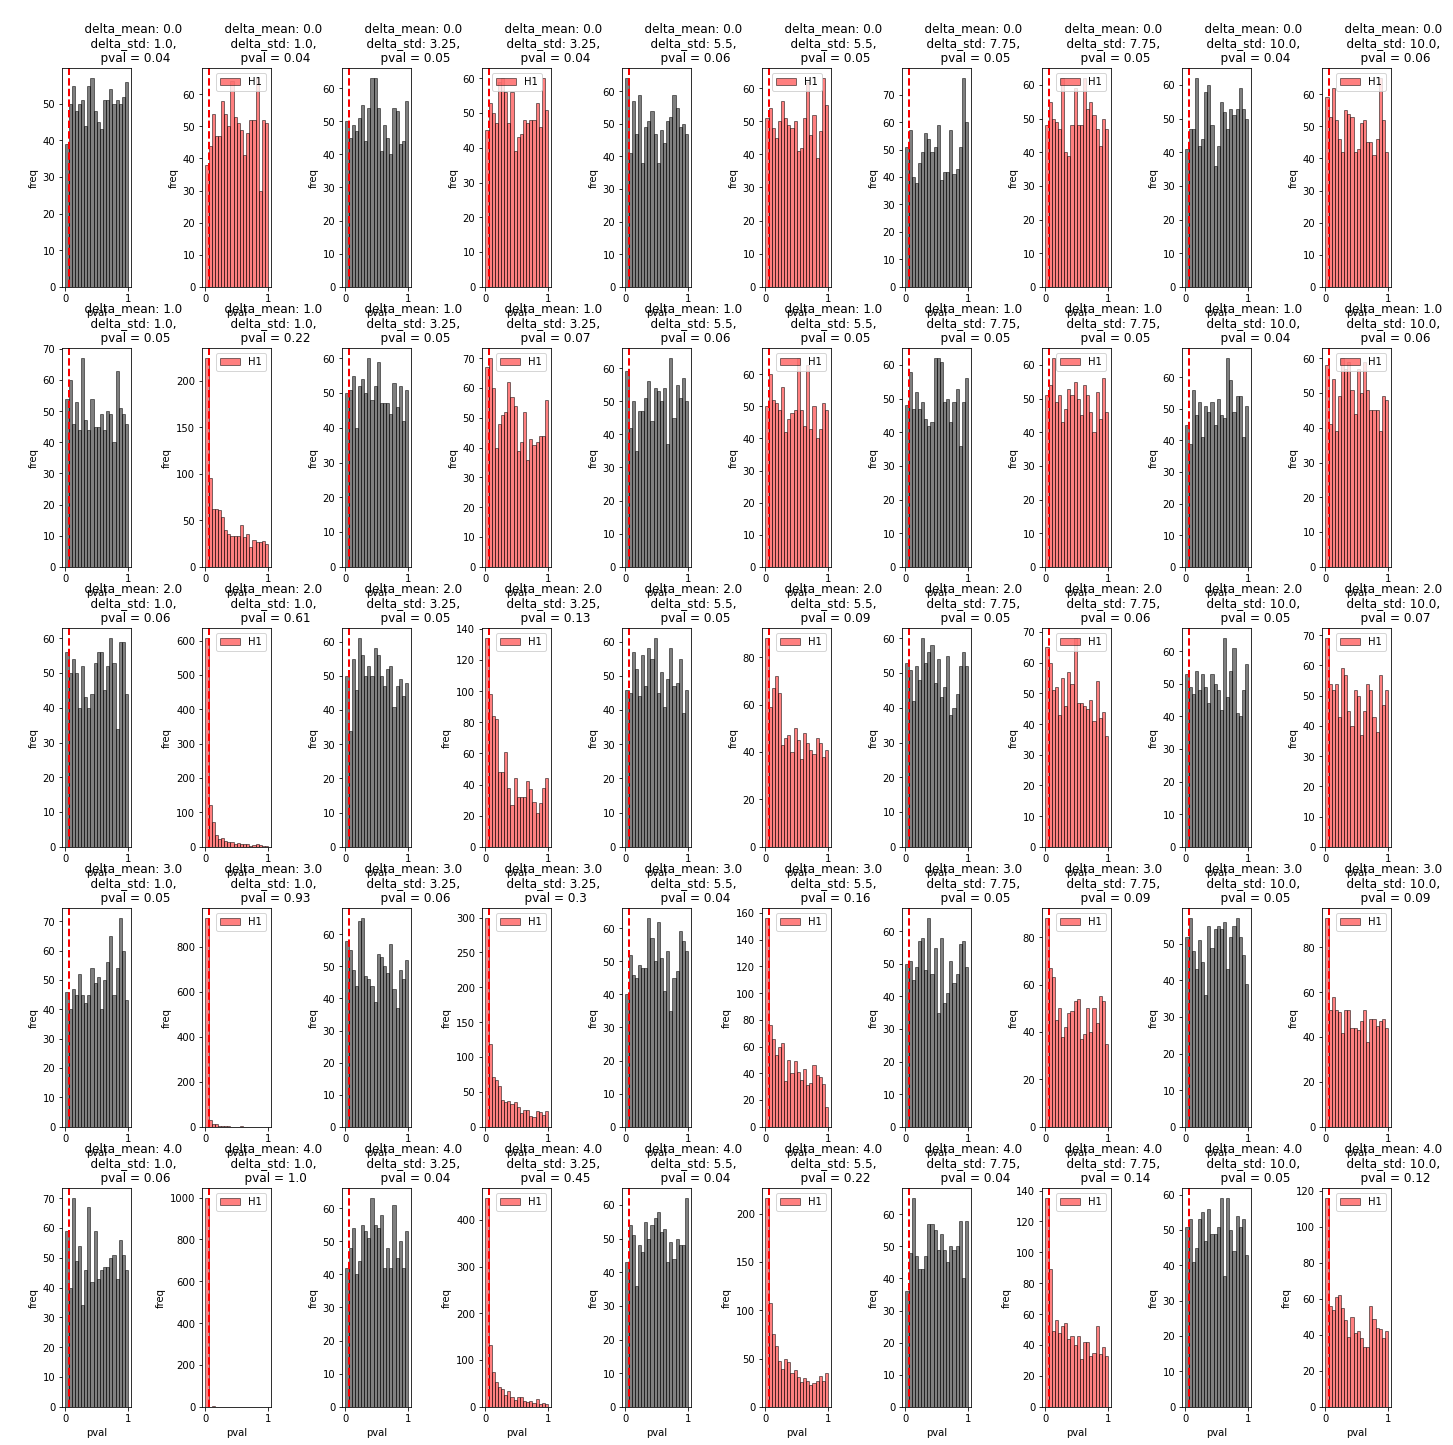

In [30]:
num_experiments = 1000  
size = 1000  
alpha = 0.05
beta = 0.2
mean_a = 100
std_a = 20
delta_means = np.linspace(0, 4, 5) 
delta_stds = np.linspace(1, 10, 5) 

fig, axes = plt.subplots(len(delta_means), len(delta_stds) * 2, figsize=(20, 20), squeeze=False)
fig.tight_layout(pad=4.0)

for i, delta_mean in tqdm(enumerate(delta_means)):
    for j, delta_std in enumerate(delta_stds):
        
        pvals_first_type = []
        pvals_first_type_numbers = []
        for _ in range(num_experiments):
            a_boots = np.random.normal(mean_a, std_a, size)
            b_boots = np.random.normal(mean_a, std_a * delta_std, size)
            _, pval = stats.ttest_ind(a_boots, b_boots, equal_var=False)
            pvals_first_type.append(pval < alpha)
            pvals_first_type_numbers.append(pval)
        
        pvals_second_type = []
        pvals_second_type_numbers = []
        for _ in range(num_experiments):
            a_boots = np.random.normal(mean_a, std_a, size)
            b_boots = np.random.normal(mean_a + delta_mean, std_a * delta_std, size)
            _, pval = stats.ttest_ind(a_boots, b_boots, equal_var=False)
            pvals_second_type.append(pval >= alpha)
            pvals_second_type_numbers.append(pval)
        
        ax = axes[i, j * 2]
        ax.hist(pvals_first_type_numbers, bins=np.linspace(0, 1, 21), edgecolor='black', color='black', alpha=0.5, label = 'H0')
        ax.set_title(f""" 
                    delta_mean: {delta_mean} 
                    delta_std: {delta_std}, 
                    pval = {np.round(np.mean(np.array(pvals_first_type_numbers) < 0.05), 2)}""")
        ax.set_xlabel('pval')
        ax.set_ylabel('freq')
        ax.axvline(alpha, color='red', linestyle='dashed', linewidth=2)
        
        ax = axes[i, j * 2 + 1]
        ax.hist(pvals_second_type_numbers, bins=np.linspace(0, 1, 21), edgecolor='black', color='red', alpha=0.5, label = 'H1')
        ax.set_title(f"""
                    delta_mean: {delta_mean} 
                    delta_std: {delta_std}, 
                    pval = {np.round(np.mean(np.array(pvals_second_type_numbers) < 0.05), 2)}""")
        ax.set_xlabel('pval')
        ax.set_ylabel('freq')
        ax.axvline(alpha, color='red', linestyle='dashed', linewidth=2)
        ax.legend()
        
plt.show()

# значительно мощность падает при увеличении дисперсии, поэтому работаем над снижением
# возможно, есть смысл определять такие кейсы отдельно, поскольку выводы могут быть даны некорректно.

### Распределение P-VALUE и граница допустимости для t-теста и экспоненциального распределения метрик

  0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\User\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\User\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


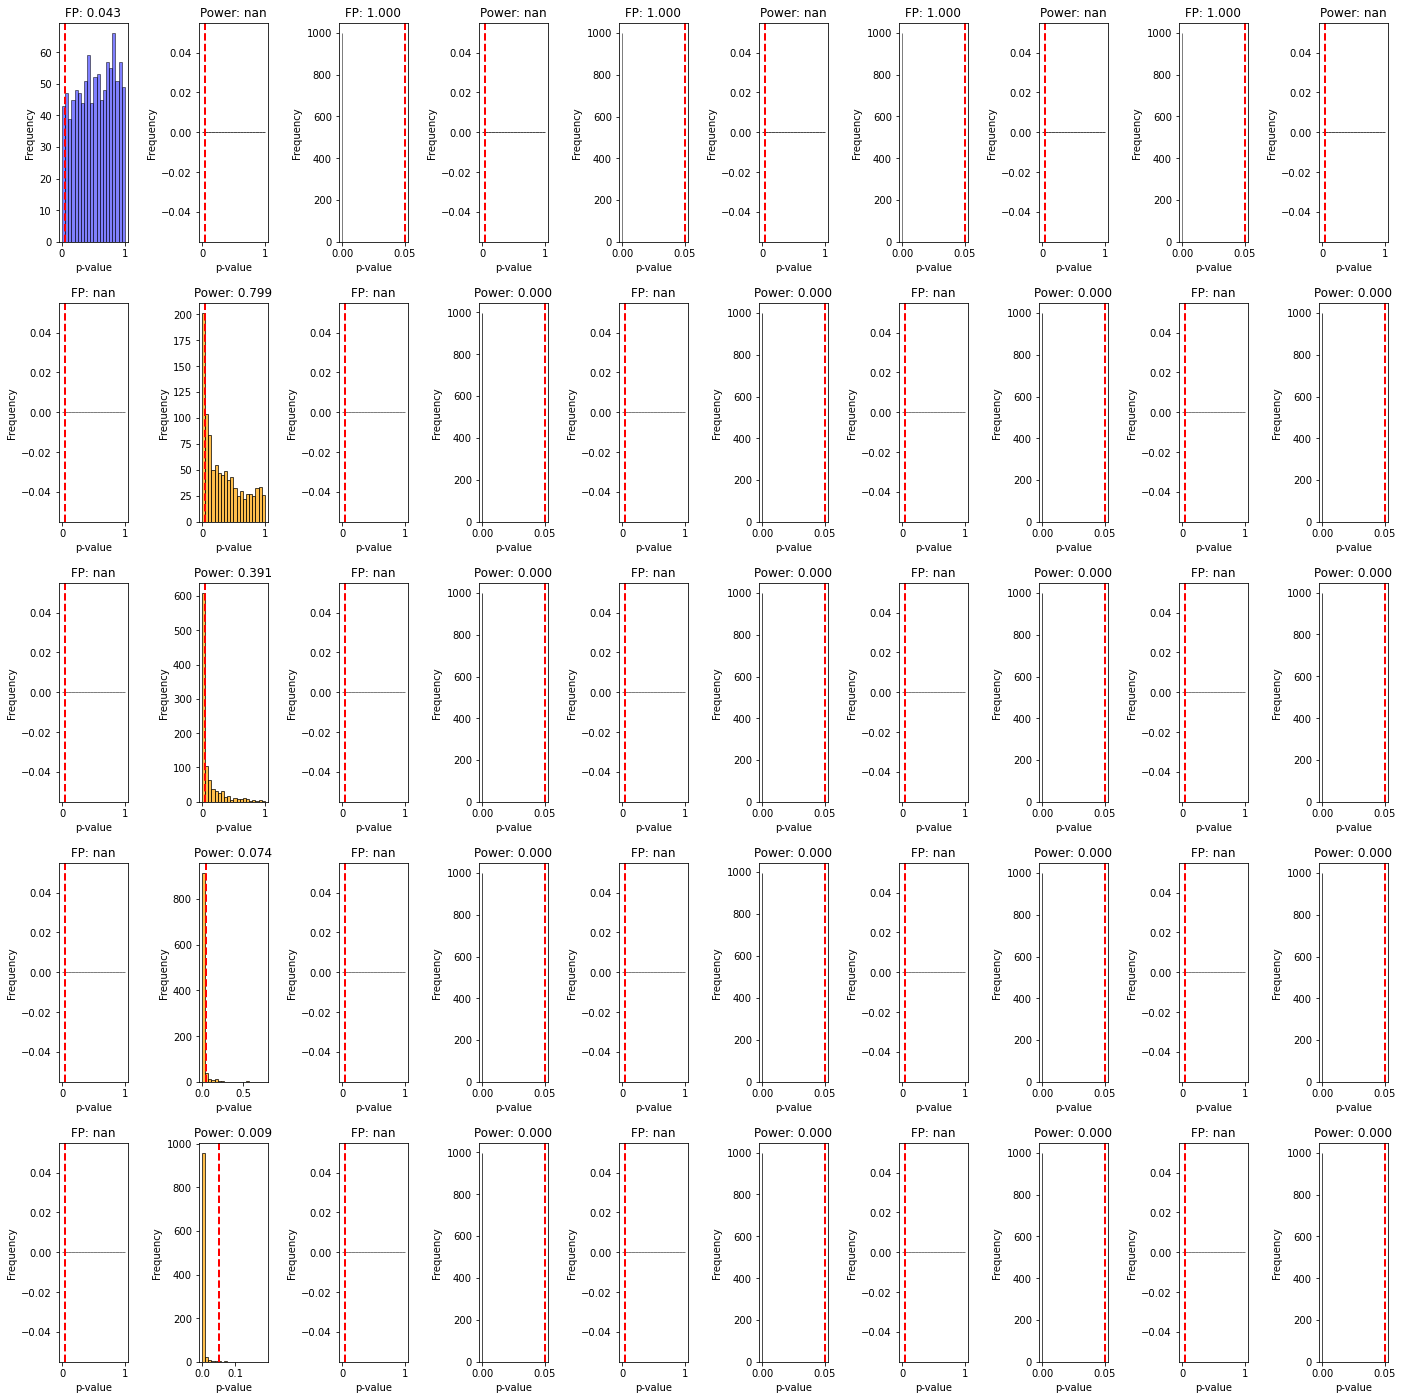

In [31]:
num_experiments = 1000  
size = 1000  
alpha = 0.05
lambda_base = 1 / 20

delta_means = np.linspace(0, 4, 5)  
delta_scales = np.linspace(1, 10, 5)  

fig, axes = plt.subplots(len(delta_means), len(delta_scales) * 2, figsize=(20, 20), squeeze=False)
fig.tight_layout(pad=4.0)

for i, delta_mean in enumerate(tqdm(delta_means)):
    for j, delta_scale in enumerate(delta_scales):
        
        pvals_first_type = []  
        pvals_second_type = []  
        
        for _ in range(num_experiments):
            a_boots = np.random.exponential(scale=1/lambda_base, size=size)
            b_boots = np.random.exponential(scale=1/(lambda_base * delta_scale), size=size) + delta_mean
            _, pval = stats.ttest_ind(a_boots, b_boots, equal_var=False)
            if delta_mean == 0:
                pvals_first_type.append(pval)
            else:
                pvals_second_type.append(pval)
        
        ax_first_type = axes[i, j * 2]
        ax_first_type.hist(pvals_first_type, bins=20, edgecolor='black', color='blue', alpha=0.5)
        ax_first_type.set_title(f"FP: {np.mean(np.array(pvals_first_type) < alpha):.3f}")
        ax_first_type.set_xlabel('p-value')
        ax_first_type.set_ylabel('Frequency')
        ax_first_type.axvline(alpha, color='red', linestyle='dashed', linewidth=2)
        ax_second_type = axes[i, j * 2 + 1]
        ax_second_type.hist(pvals_second_type, bins=20, edgecolor='black', color='orange', alpha=0.7)
        ax_second_type.set_title(f"Power: {1 - np.mean(np.array(pvals_second_type) < alpha):.3f}")
        ax_second_type.set_xlabel('p-value')
        ax_second_type.set_ylabel('Frequency')
        ax_second_type.axvline(alpha, color='red', linestyle='dashed', linewidth=2)

plt.show()


1. слишком большой разброс значений может негативно влиять на ошибку первого рода, что впоследствии приведет к ошибочным решениям.
2. в качестве исследования было взято нормальное распределение, на котором изменение дисперсии негативно влияет на ошибку второго рода, однако при большем delta на диспресии - проблем нет с ошибкой первого рода.
3. биномиальное достаточно чувствительное распределение (это можно видеть при изменении delta и функции распределения для pvalue в нескольких A/A тестах)